In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Curvas de aprendizaje de métodos basados en recursos

Cargar resultados experimentales de RandomSampling, AFL y dynhybridFed.

In [26]:
from pathlib import Path

random_results_path = Path.cwd() / "sched_random"
hybrid_results_path = Path.cwd() / "hybrid"
dynhybrid_results_path = Path.cwd() / "dynhybrid"

# load csv data
random_dfs = (pd.read_csv(random_results_path / "sched_rand_400_mnist.csv"),
	   		pd.read_csv(random_results_path / "sched_rand_400_cifar.csv"))
hybrid_dfs = (pd.read_csv(hybrid_results_path / "hybrid_400_mnist.csv"),
	   		pd.read_csv(hybrid_results_path / "hybrid_400_cifar.csv"))
dynhybrid_dfs = (pd.read_csv(dynhybrid_results_path / "dynhybrid_400_mnist.csv"),
	   		pd.read_csv(dynhybrid_results_path / "dynhybrid_400_cifar.csv"))

plots_path = Path.cwd() / "plots"

Dibujar curvas de aprendizaje para cada método (en una sola figura) para MNIST y CIFAR-10.

In [27]:
LABELS = ("RandomSampling", "HybridFL", "Dyn-HybridFL")
COLORS = ("r", "b", "g")

def plot_accuracies(dfs, labels=LABELS, title="Result", filename=None, rr_rounds=None):
	with plt.style.context("ggplot"):
		fig = plt.figure()

		i = 0
		for df, label in zip(dfs, labels):
			plt.plot(df["accuracy"], linewidth=2, label=label, alpha=0.8)

		if rr_rounds:
			plt.axvline(x=rr_rounds, color='r', linestyle='--', linewidth=1, alpha=0.5)
		
		plt.xlabel("Rounds")
		plt.ylabel("Accuracy")
		plt.grid(True)
		plt.legend(loc='best')
		if filename:
			plt.savefig(plots_path / filename, dpi=200)
		plt.show()

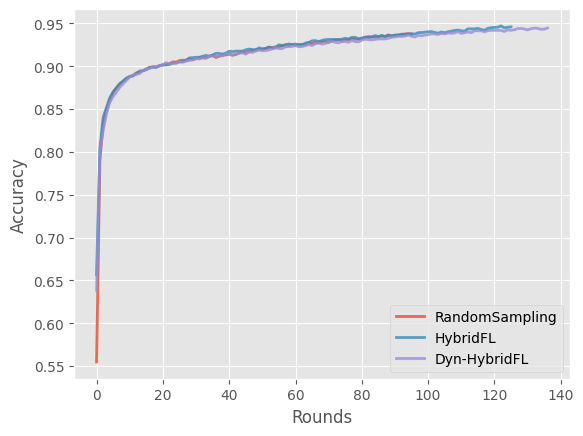

In [28]:
mnist_dfs = (random_dfs[0], hybrid_dfs[0], dynhybrid_dfs[0])
plot_accuracies(mnist_dfs, title="", filename="res_mnist_curves.png")

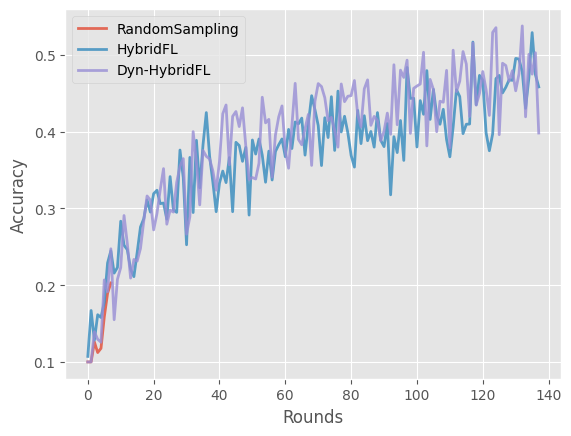

In [29]:
cifar_dfs = (random_dfs[1], hybrid_dfs[1], dynhybrid_dfs[1])
plot_accuracies(cifar_dfs, title="", filename="res_cifar_curves.png")

## Obtención de métricas de rendimiento

Obtener ToA@0.85 y ToA@0.9 para todos los métodos de selección en MNIST; del mismo modo, ToA@0.3 y ToA@0.5 para CIFAR-10.

In [30]:
def get_toa(df, acc):
	idx = df[df["accuracy"] >= acc]["elapsed_time"]

	if len(idx) > 0:
		return idx.iloc[0]
	return 'N/A'

# MNIST
df_random = random_dfs[0]
df_hybrid = hybrid_dfs[0]
df_dynhybrid = dynhybrid_dfs[0]

rand_roa_85 = get_toa(df_random, 0.85)
rand_roa_90 = get_toa(df_random, 0.9)

hybrid_roa_85 = get_toa(df_hybrid, 0.85)
hybrid_roa_90 = get_toa(df_hybrid, 0.9)

dynhybrid_roa_85 = get_toa(df_dynhybrid, 0.85)
dynhybrid_roa_90 = get_toa(df_dynhybrid, 0.9)

# CIFAR-10

df_random = random_dfs[1]
df_hybrid = hybrid_dfs[1]
df_dynhybrid = dynhybrid_dfs[1]

rand_roa_30 = get_toa(df_random, 0.3)
rand_roa_50 = get_toa(df_random, 0.5)

hybrid_roa_30 = get_toa(df_hybrid, 0.3)
hybrid_roa_50 = get_toa(df_hybrid, 0.5)

dynhybrid_roa_30 = get_toa(df_dynhybrid, 0.3)
dynhybrid_roa_50 = get_toa(df_dynhybrid, 0.5)

# make table
roa_mnist = {
	"ToA@0.85": [rand_roa_85, hybrid_roa_85, dynhybrid_roa_85],
	"ToA@0.9": [rand_roa_90, hybrid_roa_90, dynhybrid_roa_90],
}
roa_cifar = {
	"ToA@0.3": [rand_roa_30, hybrid_roa_30, dynhybrid_roa_30],
	"ToA@0.5": [rand_roa_50, hybrid_roa_50, dynhybrid_roa_50],
}

df_mnist = pd.DataFrame(roa_mnist, index=LABELS)
df_cifar = pd.DataFrame(roa_cifar, index=LABELS)

display(df_mnist)
display(df_cifar)

,ToA@0.85,ToA@0.9
RandomSampling,245.660249,248.777610
HybridFL,187.885019,195.628425
Dyn-HybridFL,168.478627,180.031754


,ToA@0.3,ToA@0.5
RandomSampling,N/A,N/A
HybridFL,168.367245,181.767906
Dyn-HybridFL,184.906264,167.825742


Obtener tiempos de entrenamiento por ronda medios y su desviación típica.

In [31]:
# MNIST
df_random = random_dfs[0]
df_hybrid = hybrid_dfs[0]
df_dynhybrid = dynhybrid_dfs[0]

rand_mean_elapsed = df_random.elapsed_time.mean()
hybrid_mean_elapsed = df_hybrid.elapsed_time.mean()
dynhybrid_mean_elapsed = df_dynhybrid.elapsed_time.mean()

rand_std_elapsed = df_random.elapsed_time.std()
hybrid_std_elapsed = df_hybrid.elapsed_time.std()
dynhybrid_std_elapsed = df_dynhybrid.elapsed_time.std()

elapsed_mnist = {
	"mean_elapsed_time": [rand_mean_elapsed, hybrid_mean_elapsed, dynhybrid_mean_elapsed],
	"std_elapsed_time": [rand_std_elapsed, hybrid_std_elapsed, dynhybrid_std_elapsed]
}

# CIFAR-10
df_random = random_dfs[1]
df_hybrid = hybrid_dfs[1]
df_dynhybrid = dynhybrid_dfs[1]

rand_mean_elapsed = df_random.elapsed_time.mean()
hybrid_mean_elapsed = df_hybrid.elapsed_time.mean()
dynhybrid_mean_elapsed = df_dynhybrid.elapsed_time.mean()

rand_std_elapsed = df_random.elapsed_time.std()
hybrid_std_elapsed = df_hybrid.elapsed_time.std()
dynhybrid_std_elapsed = df_dynhybrid.elapsed_time.std()

elapsed_cifar = {
	"mean_elapsed_time": [rand_mean_elapsed, hybrid_mean_elapsed, dynhybrid_mean_elapsed],
	"std_elapsed_time": [rand_std_elapsed, hybrid_std_elapsed, dynhybrid_std_elapsed]
}

# make tables
df_elapsed_mnist = pd.DataFrame(elapsed_mnist, index=LABELS)
df_elapsed_cifar = pd.DataFrame(elapsed_cifar, index=LABELS)

display(df_elapsed_mnist)
display(df_elapsed_cifar)

,mean_elapsed_time,std_elapsed_time
RandomSampling,251.320887,6.488021
HybridFL,190.647094,5.859994
Dyn-HybridFL,175.962740,11.186546


,mean_elapsed_time,std_elapsed_time
RandomSampling,3145.223027,36.986876
HybridFL,174.620572,10.768151
Dyn-HybridFL,174.419037,11.280995


Obtener métrica al final del entrenamiento.

In [32]:
# MNIST
df_random = random_dfs[0]
df_hybrid = hybrid_dfs[0]
df_dynhybrid = dynhybrid_dfs[0]

rand_final_accuracy = df_random.accuracy.iloc[-1]
hybrid_final_accuracy = df_hybrid.accuracy.iloc[-1]
dynhybrid_final_accuracy = df_dynhybrid.accuracy.iloc[-1]

final_accuracy_mnist = {
	"accuracy": [rand_final_accuracy, hybrid_final_accuracy, dynhybrid_final_accuracy],
}

# CIFAR-10
df_random = random_dfs[1]
df_hybrid = hybrid_dfs[1]
df_dynhybrid = dynhybrid_dfs[1]

rand_final_accuracy = df_random.accuracy.iloc[-1]
hybrid_final_accuracy = df_hybrid.accuracy.iloc[-1]
dynhybrid_final_accuracy = df_dynhybrid.accuracy.iloc[-1]

final_accuracy_cifar = {
	"accuracy": [rand_final_accuracy, hybrid_final_accuracy, dynhybrid_final_accuracy],
}

# make tables
df_final_accuracy_mnist = pd.DataFrame(final_accuracy_mnist, index=LABELS)
df_final_accuracy_cifar = pd.DataFrame(final_accuracy_cifar, index=LABELS)

display(df_final_accuracy_mnist)
display(df_final_accuracy_cifar)

,accuracy
RandomSampling,0.9370
HybridFL,0.9459
Dyn-HybridFL,0.9445


,accuracy
RandomSampling,0.2028
HybridFL,0.4583
Dyn-HybridFL,0.3982


Obtener número total de actualizaciones del modelo.

In [33]:
from pathlib import Path

random_mnist_out_filename = random_results_path / "mnist_out.txt"
hybrid_mnist_out_filename = hybrid_results_path / "mnist_out.txt"
dynhybrid_mnist_out_filename = dynhybrid_results_path / "mnist_out.txt"

random_cifar_out_filename = random_results_path / "cifar_out.txt"
hybrid_cifar_out_filename = hybrid_results_path / "cifar_out.txt"
dynhybrid_cifar_out_filename = dynhybrid_results_path / "cifar_out.txt"

In [34]:
import re
from typing import List

def total_selected(output: List[str]):
	# last line indicates the total selected clients
	last = output[-1]

	# extract the number in line
	mat = re.search(r"\d+", last)
	if mat:
		return int(mat.group())
	
	return None

Preprocesar la salida de los algoritmos.

In [35]:
from util import *

# read output
random_mnist_out = read_file(random_mnist_out_filename)
hybrid_mnist_out = read_file(hybrid_mnist_out_filename)
dynhybrid_mnist_out = read_file(dynhybrid_mnist_out_filename)

random_cifar_out = read_file(random_cifar_out_filename)
hybrid_cifar_out = read_file(hybrid_cifar_out_filename)
dynhybrid_cifar_out = read_file(dynhybrid_cifar_out_filename)

# clean output
random_mnist_out = remove_blanks(random_mnist_out)
hybrid_mnist_out = remove_blanks(hybrid_mnist_out)
dynhybrid_mnist_out = remove_blanks(dynhybrid_mnist_out)

random_cifar_out = remove_blanks(random_cifar_out)
hybrid_cifar_out = remove_blanks(hybrid_cifar_out)
dynhybrid_cifar_out = remove_blanks(dynhybrid_cifar_out)

Obtener el total de clientes seleccionados que corresponden al total de actualizaciones del modelo.

In [36]:
random_mnist_total_updates = total_selected(random_mnist_out)
hybrid_mnist_total_updates = total_selected(hybrid_mnist_out)
dynhybrid_mnist_total_updates = total_selected(dynhybrid_mnist_out)

random_cifar_total_updates = total_selected(random_cifar_out)
hybrid_cifar_total_updates = total_selected(hybrid_cifar_out)
dynhybrid_cifar_total_updates = total_selected(dynhybrid_cifar_out)

Obtenemos el total de rondas.

In [37]:
random_mnist_total_rounds= len(random_dfs[0])
hybrid_mnist_total_rounds = len(hybrid_dfs[0])
dynhybrid_mnist_total_rounds = len(dynhybrid_dfs[0])

random_cifar_total_rounds= len(random_dfs[1])
hybrid_cifar_total_rounds = len(hybrid_dfs[1])
dynhybrid_cifar_total_rounds = len(dynhybrid_dfs[1])

In [38]:
data_mnist = {
	"Total updates": [random_mnist_total_updates, hybrid_mnist_total_updates, dynhybrid_mnist_total_updates],
	"Total rounds": [random_mnist_total_rounds, hybrid_mnist_total_rounds, dynhybrid_mnist_total_rounds]
}

data_cifar = {
	"Total updates": [random_cifar_total_updates, hybrid_cifar_total_updates, dynhybrid_cifar_total_updates],
	"Total rounds": [random_cifar_total_rounds, hybrid_cifar_total_rounds, dynhybrid_cifar_total_rounds]
}

display(pd.DataFrame(data_mnist, index=LABELS))
display(pd.DataFrame(data_cifar, index=LABELS))

,Total updates,Total rounds
RandomSampling,9600,96
HybridFL,9352,126
Dyn-HybridFL,9532,137


,Total updates,Total rounds
RandomSampling,800,8
HybridFL,607,138
Dyn-HybridFL,602,138


## Análisis resultados

- Por que aunque RandomSampling tenga mas updates no logra converger a un accuracy mayor?

In [39]:
def get_random_selections(K: int, M: int, rounds: int):
	clients = np.arange(K)

	selections = {}
	for _ in range(rounds):
		choice = np.random.choice(clients, M)

		for c in choice:
			if c in selections:
				selections[c] += 1
			else:
				selections[c] = 1

	# fill up for non-selected clients
	selections = {k: selections.get(k, 0) for k in clients}

	return selections

Creamos una función que calcule la función de densidad de probabilidad (PDF) de la selección.

In [40]:
def plot_pdf(data: dict, filename=None):
	# Normalize values to get the PDF
	total_height = sum(data.values())
	pdf = {x: height / total_height for x, height in data.items()}

	# plot PDF
	x = list(data.keys())
	y = list(data.values())

	with plt.style.context("ggplot"):
		plt.bar(x, y, width=0.6, color='b', alpha=0.7)
		plt.xlabel("Cliente")
		plt.ylabel("Selecciones")
		if filename:
			plt.savefig(plots_path / filename, dpi=200)
		plt.show()

Visualizamos la selección aleatoria de clientes cuando tenemos solamente $8$ rondas de selección.

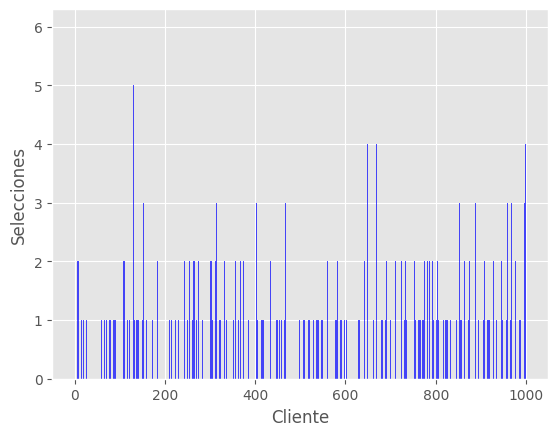

In [41]:
K = 1000
M = 100
sel = get_random_selections(K, M, 8)
plot_pdf(sel, filename="pdf_8_rounds.png")

Realizamos lo mismo pero con $602$ rondas de selección y con un $M$ reducido a la mitad (caso similar a Dyn-HybridFL).

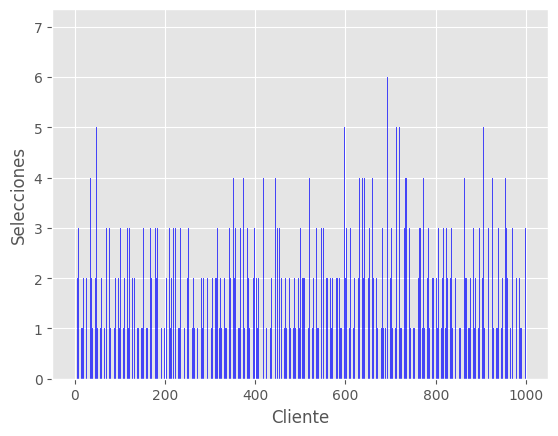

In [42]:
import math

M = 3
sel = get_random_selections(K, M, 602)
plot_pdf(sel, filename="pdf_602_rounds.png")

- Por que aunque HybridFL tenga mas updates que Dyn-HybridFL, este último logra converger mas rápido?

In [43]:
selected_hybrid_mnist = get_num_selected_clients(hybrid_mnist_out)
selected_dynhybrid_mnist = get_num_selected_clients(dynhybrid_mnist_out)

selected_hybrid_cifar = get_num_selected_clients(hybrid_cifar_out)
selected_dynhybrid_cifar = get_num_selected_clients(dynhybrid_cifar_out)

Dibujamos la evolucion del numero de clientes seleccionados $|S_t|$ por ronda

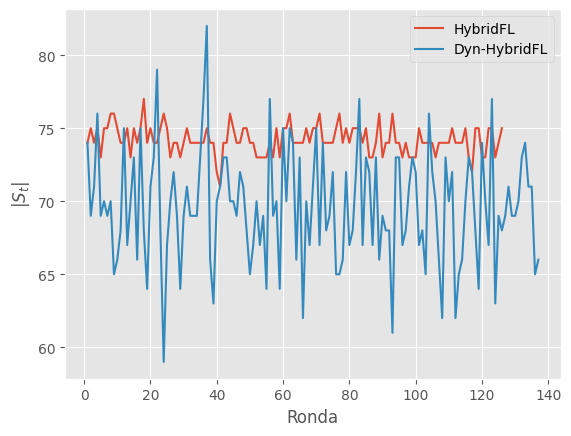

In [44]:
x_hybrid = np.arange(1, len(selected_hybrid_mnist) + 1)
y_hybrid = np.array(selected_hybrid_mnist)

x_dynhybrid = np.arange(1, len(selected_dynhybrid_mnist) + 1)
y_dynhybrid = np.array(selected_dynhybrid_mnist)

with plt.style.context("ggplot"):
	plt.plot(x_hybrid, y_hybrid, label="HybridFL")
	plt.plot(x_dynhybrid, y_dynhybrid, label="Dyn-HybridFL")

	plt.xlabel("Ronda")
	plt.ylabel(r"$|S_t|$")
	plt.legend()
	plt.savefig(plots_path / "res_comparison_St_ronda_mnist.png", dpi=200)
	plt.show()

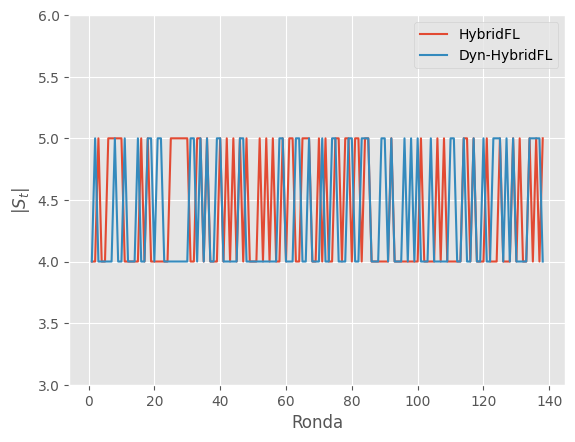

In [45]:
x_hybrid = np.arange(1, len(selected_hybrid_cifar) + 1)
y_hybrid = np.array(selected_hybrid_cifar)

x_dynhybrid = np.arange(1, len(selected_dynhybrid_cifar) + 1)
y_dynhybrid = np.array(selected_dynhybrid_cifar)

with plt.style.context("ggplot"):
	plt.plot(x_hybrid, y_hybrid, label="HybridFL")
	plt.plot(x_dynhybrid, y_dynhybrid, label="Dyn-HybridFL")

	plt.ylim([3, 6])
	plt.xlabel("Ronda")
	plt.ylabel(r"$|S_t|$")
	plt.legend()
	plt.savefig(plots_path / "res_comparison_St_ronda_cifar.png", dpi=200)
	plt.show()

In [49]:
print("HybridFL got 5 selected clients", selected_hybrid_cifar.count(5), "times")
print("Dyn-HybridFL got 5 selected clients", selected_dynhybrid_cifar.count(5), "times")

HybridFL got 5 selected clients 55 times
Dyn-HybridFL got 5 selected clients 50 times
